# Train and test an SVM

## Import boilerplate and setup

In [1]:
# first, change the working directory, if needed
import os
if os.getcwd().endswith('notebooks'):
    os.chdir('..')
os.getcwd()

'/mnt/c/Users/aryam/Documents/school/2020/spring/cse283/BloodBrainClassifier'

In [2]:
# now, import whatever else we need
import sklearn
import pandas as pd
from sklearn.svm import SVC
import scripts.starter as data
data.split(test_size=0.2)
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## Train SVC model

In [4]:
clf = make_pipeline(StandardScaler(), SVC(kernel='poly', C=.001,gamma=.001))
clf.fit(data.X_train, data.y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=0.001, kernel='poly'))])

## Test SVC model and evaluate the model's performance

In [5]:
y_pred = clf.predict(data.X_test)

In [6]:
clf.score(data.X_test, data.y_test)

0.46153846153846156

Wow, that's pretty terrible. Is there any way we can improve that?

First, let's ask ourselves what the model might be doing wrong. Let's compare the predictions to the true labels.

In [47]:
pd.concat((data.y_test, pd.Series(y_pred, index=data.y_test.index)), axis=1)

,group,0
sample,,
N_5_06_1,0,1
N_3_03_1,0,1
AD_5_12_1,1,1
AD_8_03_1,1,1
AD_1_13_1,1,1
N_4_06_1,0,1
N_7_07_1,0,1
N_7_01_1,0,1
AD_5_13_1,1,1


So it looks like the SVM is just outputting a bunch of 1s.

In [48]:
clf.decision_function(data.X_test)

array([ 0.36066959,  0.34440259,  0.32471978,  0.32438188,  0.41515045,
        0.2849067 ,  0.31970338,  0.34958158,  0.34068328,  0.15982083,
        0.07603962,  0.2017197 ,  0.26845164,  0.36847692,  0.32494291,
        0.32461163,  0.3242732 ,  0.3301183 ,  0.31545166,  0.37824334,
        0.32614946,  0.32234397,  0.25262916,  0.3242238 ,  0.09196254,
       -0.01971142])

In [49]:
from sklearn.decomposition import PCA

<AxesSubplot:xlabel='0', ylabel='1'>

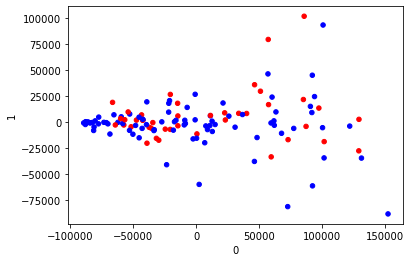

In [50]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(data.data.loc[:,data.data.columns != 'group'])
pd.DataFrame(X_new).plot.scatter(x=0, y=1, color=['blue' if x else 'red' for x in data.data.group])

In [51]:
X = data.data.loc[:,data.data.columns != 'group']
y = data.data['group']
from sklearn.model_selection import cross_val_score
sklearn.model_selection.cross_val_score(clf, X, y, cv=10)

array([0.69230769, 0.69230769, 0.53846154, 0.69230769, 0.69230769,
       0.46153846, 0.66666667, 0.66666667, 0.66666667, 0.66666667])

In [52]:
data.y

sample
AD_8_12_1     1
C_10_14_1     1
C_10_08_1     1
AD_11_08_1    1
AD_11_10_1    1
             ..
AD_2_01_1     1
AD_2_02_1     1
AD_2_03_1     1
AD_2_05_1     1
AD_2_07_1     1
Name: group, Length: 126, dtype: int64

In [53]:
X, y, X_train, y_train, X_test, y_test = data.X, data.y, data.X_train, data.y_train, data.X_test, data.y_test

In [3]:
import scripts.grid_search

model = sklearn.svm.SVC()
tuned_parameters = [{'kernel': ['poly'], 'gamma': [1e-7, 1e-8, 1e-10], 'C': [1, 0.000001], 'degree':[5, 6, 7, 8, 9]},
                    {'kernel': ['rbf'], 'gamma': [1e-3], 'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

scripts.grid_search.main(
    (data.X_train, data.y_train, data.X_test, data.y_test), SVC(), tuned_parameters
)

# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.588 (+/-0.145) for {'C': 1, 'degree': 5, 'gamma': 1e-07, 'kernel': 'poly'}
0.588 (+/-0.145) for {'C': 1, 'degree': 5, 'gamma': 1e-08, 'kernel': 'poly'}
0.455 (+/-0.117) for {'C': 1, 'degree': 5, 'gamma': 1e-10, 'kernel': 'poly'}
0.579 (+/-0.117) for {'C': 1, 'degree': 6, 'gamma': 1e-07, 'kernel': 'poly'}
0.579 (+/-0.117) for {'C': 1, 'degree': 6, 'gamma': 1e-08, 'kernel': 'poly'}
0.488 (+/-0.024) for {'C': 1, 'degree': 6, 'gamma': 1e-10, 'kernel': 'poly'}
0.579 (+/-0.117) for {'C': 1, 'degree': 7, 'gamma': 1e-07, 'kernel': 'poly'}
0.579 (+/-0.117) for {'C': 1, 'degree': 7, 'gamma': 1e-08, 'kernel': 'poly'}
0.484 (+/-0.148) for {'C': 1, 'degree': 7, 'gamma': 1e-10, 'kernel': 'poly'}
0.579 (+/-0.117) for {'C': 1, 'degree': 8, 'gamma': 1e-07, 'kernel': 'poly'}
0.579 (+/-0.117) for {'C': 1, 'degree': 8, 'gamma': 1e-08, 'kernel': 'poly'}
0.452 (+/

GridSearchCV(cv=4, estimator=SVC(),
             param_grid=[{'C': [1, 1e-06], 'degree': [5, 6, 7, 8, 9],
                          'gamma': [1e-07, 1e-08, 1e-10], 'kernel': ['poly']},
                         {'C': [1], 'gamma': [0.001], 'kernel': ['rbf']},
                         {'C': [1], 'kernel': ['linear']}],
             scoring='f1_macro')